# Beginner trading strategies - Short and Long Term Moving Average 

Here we explore a simple trading strategy to indicate BUY/SELL on 1 year of historical stock data. We pick Amazon (ticker: AMZN) as a sample stock.

An X-day Moving Average (MA) is the running average of the stock price over the last X days. They are based on one key assumption: Trends tend to continue. If a stock is going up, it's more likely to go up than reverse. Of course, in a volatile market this may not necessarily hold true. But for the purposes of a beginner trading strategy, it's a good experiment. 

When short-term sentiment (for example, 20-day MA) overtakes long-term sentiment (e.g. 50 day MA), it suggests momentum is building.

When MA Strategies Work Best:
- Trending Markets: Stocks in clear up/down trends
- Less Efficient Markets: Smaller stocks, emerging markets
- Longer Timeframes: Works better on daily/weekly vs minute-by-minute

When They Fail:
- Sideways Markets: Lots of false signals when price just bounces around
- Very Efficient Markets: Information gets priced in too quickly
- Black Swan Events: No technical indicator predicts sudden crashes

In [1]:
#Install prereq packages
!pip install -q yfinance pandas matplotlib numpy #truncate output because annoying

In [2]:
import yfinance as yf
dat = yf.Ticker("AMZN")  #love dis stock

In [3]:
#Exploring our data
dat = yf.Ticker("AMZN")
dat.info
dat.calendar
dat.analyst_price_targets
dat.quarterly_income_stmt
dat.history(period='1mo')
dat.option_chain(dat.options[0]).calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AMZN250815C00085000,2025-08-14 19:57:01+00:00,85.0,146.25,0.0,0.0,0.0,0.0,62,188,0.000010,True,REGULAR,USD
1,AMZN250815C00090000,2025-08-11 17:44:55+00:00,90.0,131.25,0.0,0.0,0.0,0.0,35,50,0.000010,True,REGULAR,USD
2,AMZN250815C00095000,2025-08-14 19:36:46+00:00,95.0,136.50,0.0,0.0,0.0,0.0,1,81,0.000010,True,REGULAR,USD
3,AMZN250815C00100000,2025-08-14 19:53:05+00:00,100.0,131.15,0.0,0.0,0.0,0.0,2,619,0.000010,True,REGULAR,USD
4,AMZN250815C00105000,2025-08-14 15:01:09+00:00,105.0,124.65,0.0,0.0,0.0,0.0,3,53,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,AMZN250815C00330000,2025-08-08 17:13:15+00:00,330.0,0.01,0.0,0.0,0.0,0.0,1,229,0.500005,False,REGULAR,USD
63,AMZN250815C00335000,2025-08-11 18:26:04+00:00,335.0,0.01,0.0,0.0,0.0,0.0,2,2333,0.500005,False,REGULAR,USD
64,AMZN250815C00340000,2025-08-14 13:34:24+00:00,340.0,0.01,0.0,0.0,0.0,0.0,11,1405,0.500005,False,REGULAR,USD
65,AMZN250815C00345000,2025-08-01 18:13:31+00:00,345.0,0.01,0.0,0.0,0.0,0.0,2,1805,0.500005,False,REGULAR,USD


In [4]:
#Shape of data, lets do 1 yr for now
price_data=dat.history(period="1y")
print("Shape of data : ",price_data.shape)
print("Column names : ", price_data.columns)
print("First few days\n:", price_data.head())

#note that the number of rows=number of trading days in the past year. 
# "Open" is the price when the markets opened on that day
# "Close" is the price when the markets closed
# For our price calculation for trades we will use the close price (if we use the open price, it's unrealistic because I'm for sure not going to sit and execute a trade at exactly 9 am and 1 second.
# If we used the high or low, it would be like choosing a price that's convenient for us. So the fairest option is to go with the close price.


Shape of data :  (250, 7)
Column names :  Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
First few days
:                                  Open        High         Low       Close  \
Date                                                                        
2024-08-15 00:00:00-04:00  174.860001  177.910004  173.990005  177.589996   
2024-08-16 00:00:00-04:00  177.039993  178.339996  176.259995  177.059998   
2024-08-19 00:00:00-04:00  177.639999  178.300003  176.160004  178.220001   
2024-08-20 00:00:00-04:00  177.919998  179.009995  177.429993  178.880005   
2024-08-21 00:00:00-04:00  179.919998  182.389999  178.889999  180.110001   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-08-15 00:00:00-04:00  51698500        0.0           0.0  
2024-08-16 00:00:00-04:00  31489200        0.0           0.0  
2024-08-19 00:00:00-04:00  31129800        0.0        

In [5]:
#Find out the day when the stock price jumped the highest
#Wish I would have bought on 9th April 2025
price_data['Daily_Change']=price_data['Close']-price_data["Open"]
biggest_jump_day = price_data.loc[price_data['Daily_Change'].idxmax()]
print(biggest_jump_day)

Open            1.721200e+02
High            1.926500e+02
Low             1.699300e+02
Close           1.911000e+02
Volume          1.168043e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Daily_Change    1.898001e+01
Name: 2025-04-09 00:00:00-04:00, dtype: float64


In [6]:
#Find out the day when the stock price dropped the lowest. This is to get a sense of how volatile the stock is
biggest_drop_day = price_data.loc[price_data['Daily_Change'].idxmin()]
print(biggest_drop_day) 

Open            1.852300e+02
High            1.859000e+02
Low             1.685700e+02
Close           1.706600e+02
Volume          8.771040e+07
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Daily_Change   -1.456999e+01
Name: 2025-04-08 00:00:00-04:00, dtype: float64


In [7]:
#Calculate the short and long term Moving Averages. Here we use 20 and 50 but free to use whatever range works best. 
# In fact we will be testing this later on
price_data['MA_20'] = price_data['Close'].rolling(window=20, min_periods=1).mean()
price_data['MA_50'] = price_data['Close'].rolling(window=50, min_periods=1).mean()

In [8]:
print(price_data[['Close', 'MA_20', 'MA_50']])

                                Close       MA_20       MA_50
Date                                                         
2024-08-15 00:00:00-04:00  177.589996  177.589996  177.589996
2024-08-16 00:00:00-04:00  177.059998  177.324997  177.324997
2024-08-19 00:00:00-04:00  178.220001  177.623332  177.623332
2024-08-20 00:00:00-04:00  178.880005  177.937500  177.937500
2024-08-21 00:00:00-04:00  180.110001  178.372000  178.372000
...                               ...         ...         ...
2025-08-08 00:00:00-04:00  222.690002  225.517500  219.157401
2025-08-11 00:00:00-04:00  221.300003  225.298000  219.469401
2025-08-12 00:00:00-04:00  221.470001  225.054000  219.798601
2025-08-13 00:00:00-04:00  224.559998  225.122500  220.156801
2025-08-14 00:00:00-04:00  230.979996  225.477499  220.662201

[250 rows x 3 columns]


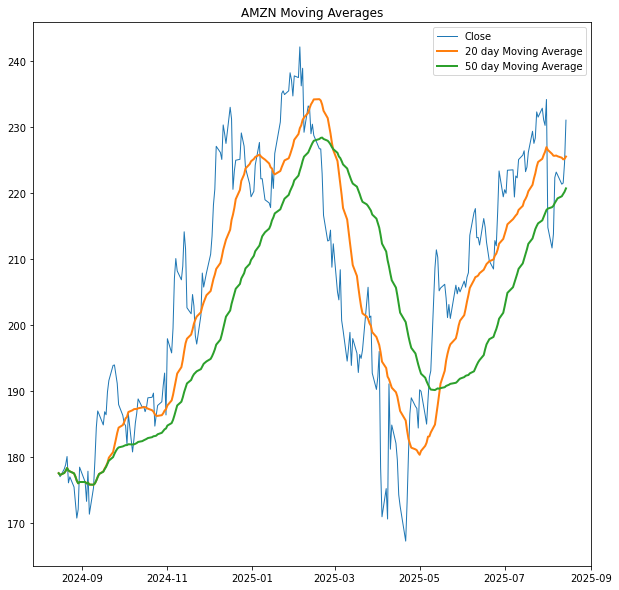

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(price_data.index,price_data['Close'],label="Close",linewidth=1)
plt.plot(price_data.index,price_data['MA_20'],label="20 day Moving Average", linewidth = 2)
plt.plot(price_data.index,price_data['MA_50'],label="50 day Moving Average",linewidth=2)

plt.legend()
plt.title("AMZN Moving Averages")

plt.show()

Note that the blue line here (close price) is jagged and indicates a lot of daily fluctuation. The orange line (20 day MA) is smoother than Close price and follows trends much quicker. The 50 day MA is the smoothest and reacts the most slowly to daily changes. 

When the 20 day MA crosses *above* the 50 day MA, it means that the short term trend is proving to be more bullish than long-term. This indicates the trend might be shifting upward -> BUY signal.

Similarly, when the 20 day MA crosses *below* the 50 day MA, it means that the short term trend is more bearish than long-term -> SELL signal. 

We will use this simple logic to indicate BUY/SELL for now.

You might be wondering: why not 'buy the dip'? That's because at least using these limited metrics, it's hard to predict whether it's simply a 'dip' or a true decline (in which case...bye bye, bank balance). So we stick with buying at the start of an upward trend. Sure, you might lose some bucks, but as Warren Buffet wisely said, "I like to shoot fish in a barrel. But I like to do it after the water has run out."

In [10]:
#Check if the short term moving average for that day is greater than the long term MA
price_data['MA_20_above_50'] = price_data['MA_20'] > price_data['MA_50']

#Check the previous day's value
price_data["yesterday_above"] = price_data['MA_20_above_50'].shift(1)

price_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Change,MA_20,MA_50,MA_20_above_50,yesterday_above
Date,,,,,,,,,,,,
2024-08-15 00:00:00-04:00,174.860001,177.910004,173.990005,177.589996,51698500,0.0,0.0,2.729996,177.589996,177.589996,False,NaN
2024-08-16 00:00:00-04:00,177.039993,178.339996,176.259995,177.059998,31489200,0.0,0.0,0.020004,177.324997,177.324997,False,False
2024-08-19 00:00:00-04:00,177.639999,178.300003,176.160004,178.220001,31129800,0.0,0.0,0.580002,177.623332,177.623332,False,False
2024-08-20 00:00:00-04:00,177.919998,179.009995,177.429993,178.880005,26255200,0.0,0.0,0.960007,177.937500,177.937500,False,False
2024-08-21 00:00:00-04:00,179.919998,182.389999,178.889999,180.110001,35599100,0.0,0.0,0.190002,178.372000,178.372000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-08 00:00:00-04:00,223.139999,223.800003,221.880005,222.690002,32970500,0.0,0.0,-0.449997,225.517500,219.157401,True,True
2025-08-11 00:00:00-04:00,221.779999,223.050003,220.399994,221.300003,31646200,0.0,0.0,-0.479996,225.298000,219.469401,True,True
2025-08-12 00:00:00-04:00,222.229996,223.500000,219.050003,221.470001,37185800,0.0,0.0,-0.759995,225.054000,219.798601,True,True


In [11]:
price_data["Signal"]="HOLD" #By default our position is HOLD


In [12]:
#We define sell condition: If the short term MA is below the long term MA and yesterday it was the reverse, means the short term is doing under long term
sell_condition=(price_data["MA_20_above_50"]=="False") & (price_data["yesterday_above"]=="True")

#when the opposite happens, we buy
buy_condition=(price_data["MA_20_above_50"]=="True") & (price_data["yesterday_above"]=="False")

#loc helps you iterate over rows in a Dataframe. It applies the condition to each element in the column provided.
price_data.loc[sell_condition,"Signal"]="SELL"
price_data.loc[buy_condition,"Signal"]="BUY"

price_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Change,MA_20,MA_50,MA_20_above_50,yesterday_above,Signal
Date,,,,,,,,,,,,,
2024-08-15 00:00:00-04:00,174.860001,177.910004,173.990005,177.589996,51698500,0.0,0.0,2.729996,177.589996,177.589996,False,NaN,HOLD
2024-08-16 00:00:00-04:00,177.039993,178.339996,176.259995,177.059998,31489200,0.0,0.0,0.020004,177.324997,177.324997,False,False,HOLD
2024-08-19 00:00:00-04:00,177.639999,178.300003,176.160004,178.220001,31129800,0.0,0.0,0.580002,177.623332,177.623332,False,False,HOLD
2024-08-20 00:00:00-04:00,177.919998,179.009995,177.429993,178.880005,26255200,0.0,0.0,0.960007,177.937500,177.937500,False,False,HOLD
2024-08-21 00:00:00-04:00,179.919998,182.389999,178.889999,180.110001,35599100,0.0,0.0,0.190002,178.372000,178.372000,False,False,HOLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-08 00:00:00-04:00,223.139999,223.800003,221.880005,222.690002,32970500,0.0,0.0,-0.449997,225.517500,219.157401,True,True,HOLD
2025-08-11 00:00:00-04:00,221.779999,223.050003,220.399994,221.300003,31646200,0.0,0.0,-0.479996,225.298000,219.469401,True,True,HOLD
2025-08-12 00:00:00-04:00,222.229996,223.500000,219.050003,221.470001,37185800,0.0,0.0,-0.759995,225.054000,219.798601,True,True,HOLD


In [13]:
#Let's check if we got some buys or sells
price_data["Signal"].values

array(['HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
      

In [14]:
print("Signal summary:")
print(price_data['Signal'].value_counts())

#Show actual signal dates
signals = price_data[price_data['Signal'] != 'HOLD']
print(f"\nFound {len(signals)} trading signals:")
print(signals[['Close', 'MA_20', 'MA_50', 'Signal']].head(10))

Signal summary:
HOLD    250
Name: Signal, dtype: int64

Found 0 trading signals:
Empty DataFrame
Columns: [Close, MA_20, MA_50, Signal]
Index: []


As you can see our BUY/SELL signals coincide with the chart we sketched out earlier. Now for the fun part–let's see how much $$ this strategy made by backtesting on our data.

In [15]:
#starting w 10k

#Initial Portfolio State
starting_cash=10000
cash=starting_cash
shares=0
portfolio_values=[]

for date, row in price_data.iterrows():
    signal=row["Signal"]
    price=row["Close"]
    
    if signal=="BUY":
        shares=cash/price
        cash-=shares*price
    elif signal=="SELL":
        cash+=shares*price
        shares=0
        
    portfolio_value = cash + shares * price
    portfolio_values.append(portfolio_value)
        
        
price_data['Portfolio_Value'] = portfolio_values


In [16]:
#Final price

#Get last row as df
print(price_data[['Close', 'Portfolio_Value', 'Signal']].tail(1))

                                Close  Portfolio_Value Signal
Date                                                         
2025-08-14 00:00:00-04:00  230.979996          10000.0   HOLD


In [17]:
#Debug portfolio tracking
print("Final values:")
print(f"Cash: ${cash}")
print(f"Shares: {shares}")
print(f"Last price: ${price_data['Close'].iloc[-1]}")
print(f"Portfolio value: ${price_data['Portfolio_Value'].iloc[-1]}")

print("\nProfit: ", price_data['Portfolio_Value'].iloc[-1]-starting_cash)

Final values:
Cash: $10000
Shares: 0
Last price: $230.97999572753906
Portfolio value: $10000.0

Profit:  0.0


This gives us a return of 23.99% in a single year!! Now let's see how this compares to if we had just bought and held Amazon this whole duration.

In [25]:
first_price = price_data['Close'].iloc[0]
last_price = price_data['Close'].iloc[-1]



buy_hold_shares = starting_cash / first_price
buy_hold_final = buy_hold_shares * last_price
buy_hold_return = (buy_hold_final-10000)/100
print(f"Buy and Hold final value: ${buy_hold_final:.2f}")
print(f"Our Strategy: 23.99%")
print(f"Buy and Hold final return: {buy_hold_return:.2f}%")
print(f"Difference: {buy_hold_return-23.99:.2f}%")

Buy and Hold final value: $13006.36
Our Strategy: 23.99%
Buy and Hold final return: 30.06%
Difference: 6.07%


OK...so maybe short and long term MA would not have been the best strategy for AMZN stock. Why did this happen? Let's see.
Our MA crossover strategy:

1. Caught the ride up (Sept BUY signal)
2. Got out before the crash (Feb SELL signal)
3. Got back in for recovery (May BUY signal)
But...missed some timing

Buy-and-hold just got lucky that the start/end prices worked out favorably, but anyone holding through that crash would have been stress-eating for months! 

Why I would probably opt for the short-and-long MA strategy (as someone constantly stressed all the time):
- Maximum drawdown protection - we avoided that brutal $242 → $167 crash
- Smoother emotional journey - less stress than holding through that nightmare

On to exploring improvements to our basic model!